--Abdelrahman Mahmoud Shoukry--211002045-- Nile University--

This project is about the prediction of heart attack by using 8 models and a dataset containing 28 columns (features) and 158,355 rows and It includes key demographic, clinical, lifestyle, and environmental factors associated with cardiovascular risks. and the ‘outcome’ column which is the target column contain if there is a heart attack or not with 2 classes that would be predicted in this notebook Also, I did an application by using the top two models to make it easy for users to make their prediction through an app using Streamlit This notebook is detailed in every cell with the code

some numbers reflects yes or no--
--hypertension (int): High blood pressure (1 = Yes, 0 = No)
--diabetes (int): Diagnosed diabetes (1 = Yes, 0 = No)
--cholesterol_level (int): Total cholesterol level (mg/dL)
--obesity (int): BMI > 30 (1 = Yes, 0 = No)
--waist_circumference (int): Waist circumference in cm
--family_history (int): Family history of heart disease (1 = Yes, 0 = No)
--previous_heart_disease (int): Prior heart disease (1 = Yes, 0 = No)
--medication_usage (int): Currently taking heart-related medications (1 = Yes, 0 = No)
--participated_in_free_screening (int): Attended Indonesia’s free health screening program (1 = Yes, 0 = No)

##Target Variable##
heart_attack (int): Heart attack occurrence (1 = Yes, 0 = No)

--I made this project based on three questions--

-first -> whether the models I use can predict the causation of heart attack with high accuracy? --Second-> What are the most important features that significantly affect heart attack classification? --third -> How can I make a diagnostic tool accessible and useful to non-technical users through an interactive Streamlit application?

In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

In [2]:
# read the dataset
df = pd.read_csv('heart_attack_prediction.csv')

In [3]:
# print the first 10 rows as summrizing 
df.head(10)

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1
5,52,Male,Urban,Middle,0,0,231,1,81,1,...,71,129,34,148,191,Normal,0,1,1,0
6,73,Female,Rural,Low,0,0,238,1,91,0,...,97,88,40,128,167,Normal,0,1,1,0
7,64,Female,Urban,Low,0,1,165,0,72,1,...,83,112,47,100,50,Normal,0,0,1,1
8,49,Female,Urban,Low,0,0,186,0,115,0,...,87,147,46,157,198,Abnormal,0,1,0,0
9,61,Male,Rural,Low,0,0,121,1,88,1,...,87,79,34,93,164,Normal,0,0,0,1


In [4]:
#Report the number of missing values per feature and Visualize class distribution
#identify dataset types
print(df.info())
df.describe()
# detect missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

In [5]:
#handle missing data using mean
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
print(df.head())
#trying to drop missing data
df = df.dropna()
# Verify missing values are handled
print(df.isnull().sum())

   age  gender region income_level  hypertension  diabetes  cholesterol_level  \
0   60    Male  Rural       Middle             0         1                211   
1   53  Female  Urban          Low             0         0                208   
2   62  Female  Urban          Low             0         0                231   
3   73    Male  Urban          Low             1         0                202   
4   52    Male  Urban       Middle             1         0                232   

   obesity  waist_circumference  family_history  ... blood_pressure_diastolic  \
0        0                   83               0  ...                       62   
1        0                  106               1  ...                       76   
2        1                  112               1  ...                       74   
3        0                   82               1  ...                       65   
4        0                   89               0  ...                       75   

  fasting_blood_sugar chol

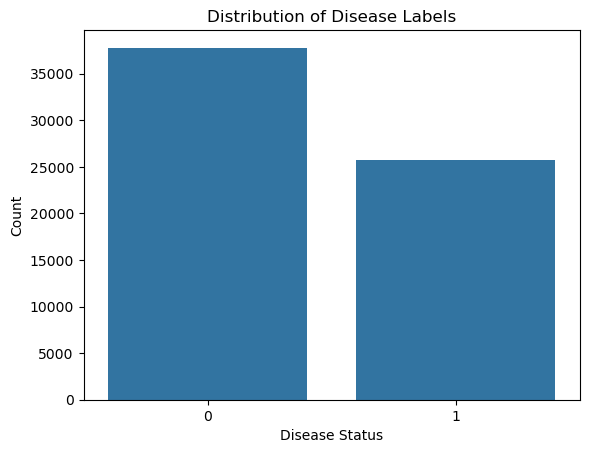

In [6]:
#Visualize class distribution using seaborn.countplot.
#Target Variable heart_attack (int): Heart attack occurrence (1 = Yes, 0 = No)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='heart_attack', data=df)
plt.title('Distribution of Disease Labels')
plt.xlabel('Disease Status')
plt.ylabel('Count')
plt.show()

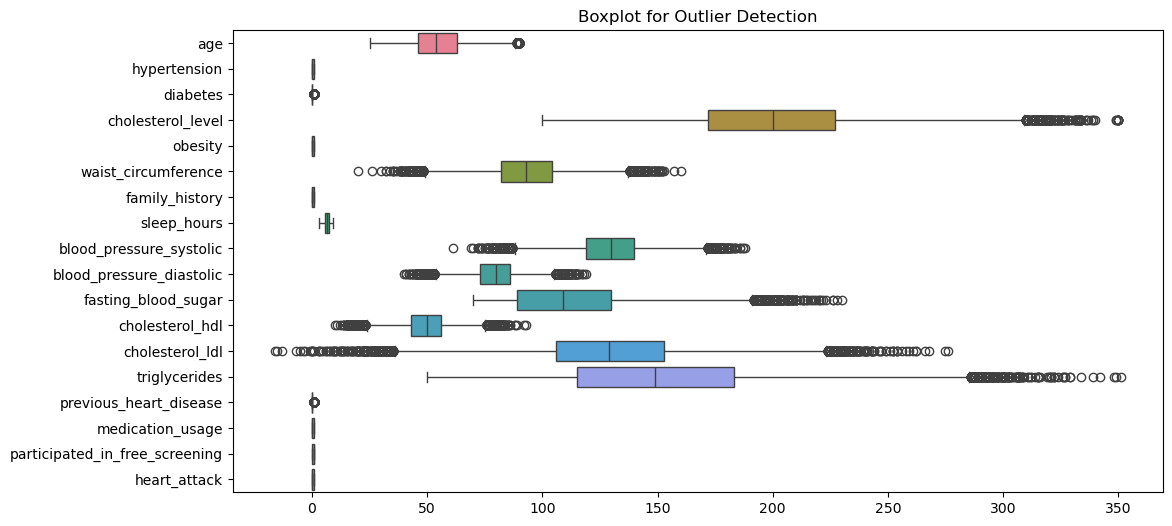

In [7]:
# Outlier detection with visualizing
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot for Outlier Detection")
plt.show()

In [8]:
#outlier detection
# Compute Z-scores
z_scores = stats.zscore(df.select_dtypes(include=['number']))
# Identify outliers
outliers = (abs(z_scores) > 2).any(axis=1)
#remove outliers
df_cleaned = df[~outliers]
print(df_cleaned)
print("Original size:", df.shape, "After outlier removal:", df_cleaned.shape)

        age  gender region income_level  hypertension  diabetes  \
2        62  Female  Urban          Low             0         0   
3        73    Male  Urban          Low             1         0   
6        73  Female  Rural          Low             0         0   
8        49  Female  Urban          Low             0         0   
12       57  Female  Rural         High             0         0   
...     ...     ...    ...          ...           ...       ...   
158338   64  Female  Rural          Low             0         0   
158339   64  Female  Rural          Low             0         0   
158340   46    Male  Urban       Middle             0         0   
158342   37  Female  Urban       Middle             0         0   
158343   51    Male  Urban          Low             0         0   

        cholesterol_level  obesity  waist_circumference  family_history  ...  \
2                     231        1                  112               1  ...   
3                     202        0 

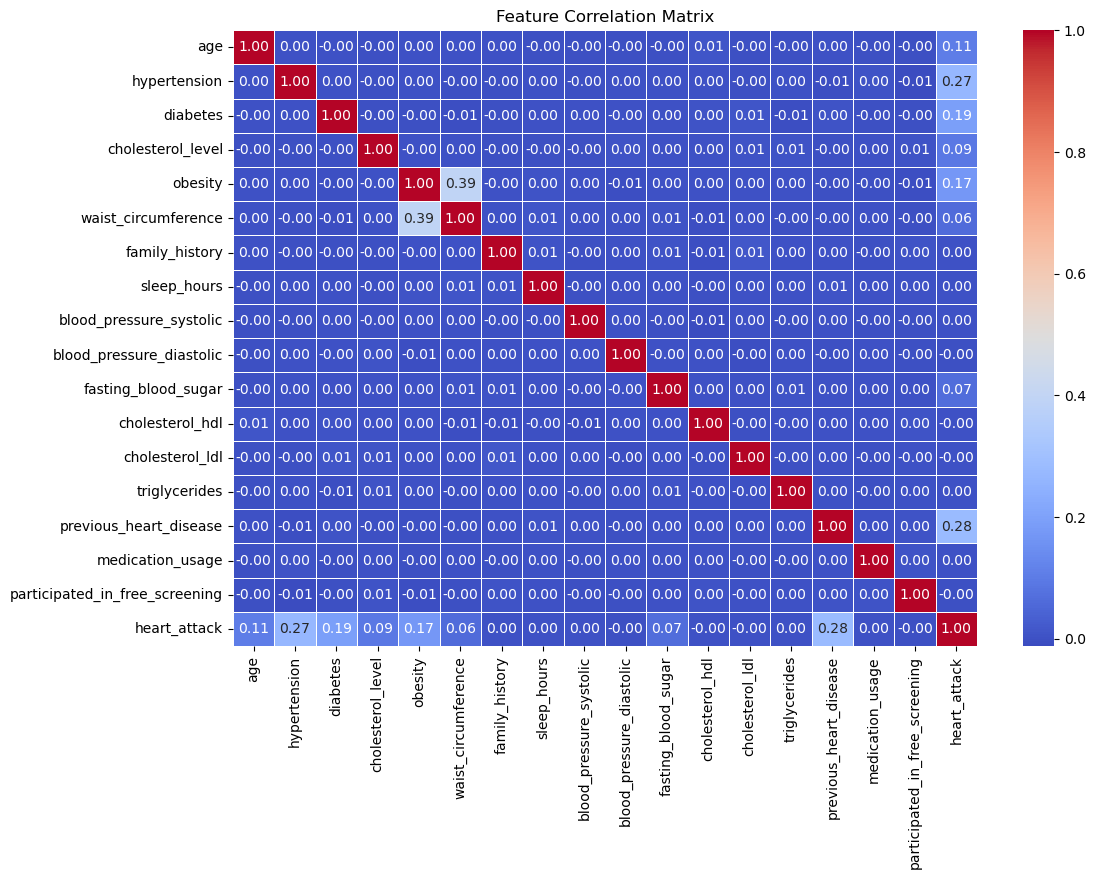

In [9]:
#import seaborn as sns
import matplotlib.pyplot as plt

# Ensure only numeric columns are included
df_numeric = df.select_dtypes(include=['number'])

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

This is a Feature Correlation Matrix — it shows the Pearson correlation coefficients between all pairs of features in your dataset.
Values range from -1 to +1:

+1 → Perfect positive correlation

0 → No correlation

-1 → Perfect negative correlation

In [10]:
#Encode Categorical Features
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
#Encode Target Variable
X = df.drop(columns=['heart_attack']) 
y = df['heart_attack']

In [11]:
# Apply StandardScaler
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X [:5]  # Show first 5 rows of scaled data

array([[ 0.63073952, -1.03707657,  0.73752479, -0.42363754, -0.65661531,
        -0.50077735,  0.78439997,  1.72659517,  1.14217576,  1.52638635,
         1.41741797,  0.57505324,  1.07205004, -1.22325154, -0.36879281,
        -0.24007788, -0.10207167, -0.90151433, -0.54694736,  0.26067732,
         1.95553092,  0.01850348,  0.43153817, -2.00864234, -0.50330949,
         1.00326481, -1.22349223],
       [ 1.55453146,  0.96424896,  0.73752479, -0.42363754,  1.52296175,
        -0.50077735,  0.05689625, -0.57917456, -0.69492211,  1.52638635,
         0.00376191,  0.57505324,  1.07205004,  0.81749335, -0.36879281,
        -1.38885921,  1.00441096,  0.43481296, -1.44529693, -0.45858055,
         0.24974558, -1.27537513, -0.07683705,  0.49784871, -0.50330949,
         1.00326481,  0.81733253],
       [-0.20907134,  0.96424896,  0.73752479,  0.97870541,  1.52296175,
        -0.50077735,  0.80948631, -0.57917456, -0.26626594, -0.65514213,
        -1.40989414,  0.57505324,  1.07205004,  0.8174

In [12]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [13]:
#feature selection
from sklearn.feature_selection import SelectKBest, f_classif
feature_cols = df.columns.drop('heart_attack')  # get feature names

# Apply feature selection on your NumPy X_train and y_train
selector = SelectKBest(score_func=f_classif, k=min(5, X_train.shape[1]))
X_selected = selector.fit_transform(X_train, y_train)

# Get indices of selected features
selected_indices = selector.get_support(indices=True)

# Map back to feature names using feature_cols
selected_features = feature_cols[selected_indices]

print("Selected Features:", list(selected_features))


Selected Features: ['hypertension', 'diabetes', 'obesity', 'smoking_status', 'previous_heart_disease']


In [14]:
### ----- model 1 Regression model-----###
# Initialize Logistic Regression model
model = LogisticRegression()
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Predictions on the test set
y_pred = model.predict(X_test)

In [16]:
# Evaluation metrics include accuracy, percision, recall , f1 score , confusion matrix, roc_auc score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [17]:
## Print Evaluation Metrics each in seperate line
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.7245
Precision: 0.6884
Recall: 0.5840
F1-Score: 0.6319
ROC-AUC: 0.7020
Confusion Matrix:
[[9296 2040]
 [3210 4507]]


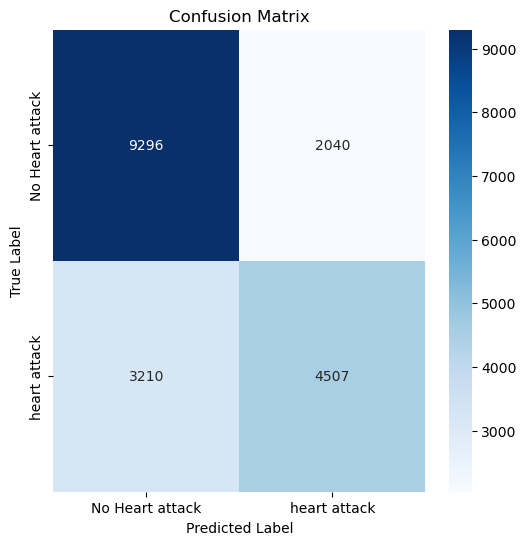

In [18]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart attack', 'heart attack'], yticklabels=['No Heart attack', 'heart attack'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

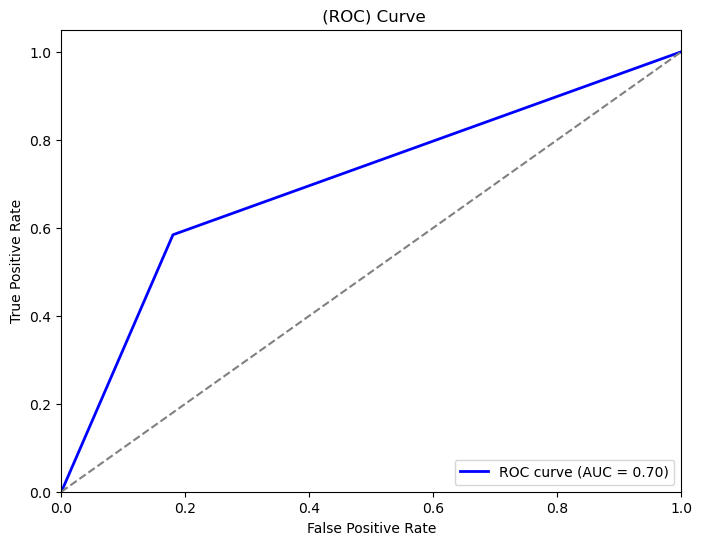

In [19]:
# Compute ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [20]:
### ----- model 2 KNN-----###
# Initialize KNN with K=7
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
# Train the model
knn.fit(X_train, y_train) 

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [21]:
# Predict on test data
y_pred_knn = knn.predict(X_test)

In [22]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.68
Confusion Matrix:
[[9427 1909]
 [4167 3550]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.83      0.76     11336
           1       0.65      0.46      0.54      7717

    accuracy                           0.68     19053
   macro avg       0.67      0.65      0.65     19053
weighted avg       0.68      0.68      0.67     19053



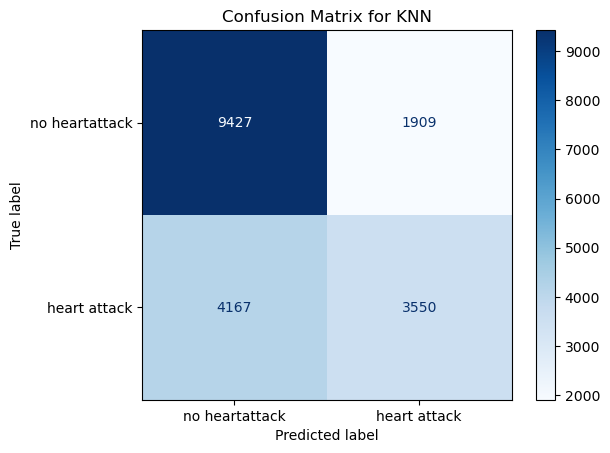

In [23]:
#Plot the Confusion Matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

#Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["no heartattack", "heart attack"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for KNN")
plt.show()

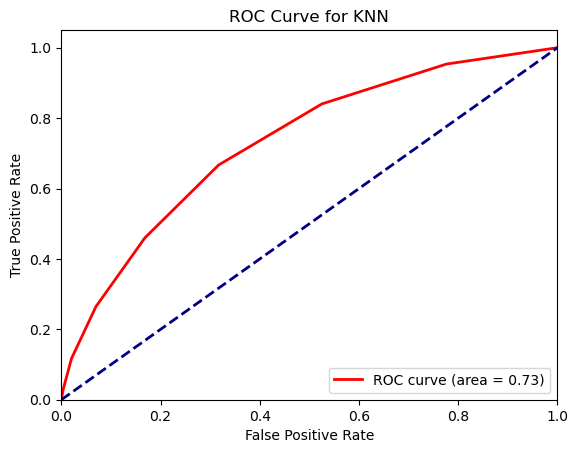

In [24]:
# Plot the ROC Curve
# Get predicted probabilities for the positive class ("cancer")
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")
plt.show()

In [25]:
### ----- model 3 Naive bayes-----###
# Initialize and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [26]:
y_pred_nb = nb.predict(X_test)

In [27]:
#classification repots 
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred_nb)
print("Classification Report:")
print(class_report)

Accuracy: 0.6811
ROC-AUC: 0.7308
Confusion Matrix:
[[8935 2401]
 [2955 4762]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77     11336
           1       0.66      0.62      0.64      7717

    accuracy                           0.72     19053
   macro avg       0.71      0.70      0.70     19053
weighted avg       0.72      0.72      0.72     19053



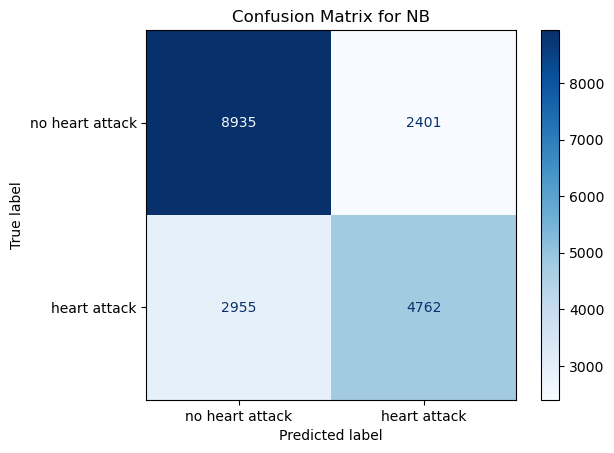

In [28]:
#confusion matrix
#Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["no heart attack", "heart attack"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for NB")
plt.show()

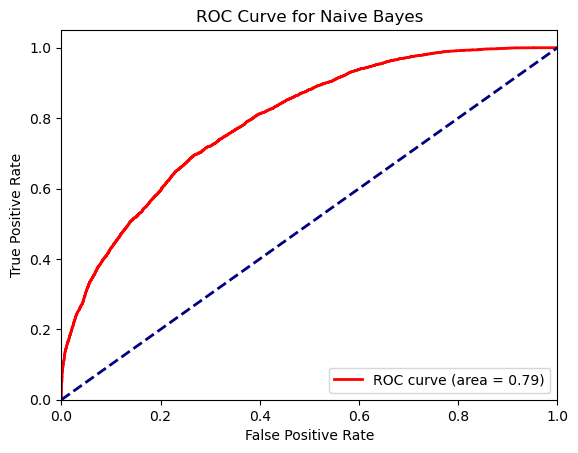

In [29]:
# Plot the ROC Curve
# Get predicted probabilities for the positive class ("cancer")
y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]
# Compute ROC curve and AUC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
# Plot ROC curve
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label=f'ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [30]:
### ----- model 4 Random Forest-----###
results = {}
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
results['Random Forest'] = accuracy_score(y_test, rf.predict(X_test))
# Optional: print results
print(results)

{'Random Forest': 0.7241904162074214}


In [31]:
y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, pos_label= 1))
print("Recall:", recall_score(y_test, y_pred_rf, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred_rf, pos_label=1))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.7241904162074214
Precision: 0.6796555750145943
Recall: 0.6034728521446158
F1 Score: 0.6393026288695175

Confusion Matrix:
 [[9141 2195]
 [3060 4657]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78     11336
           1       0.68      0.60      0.64      7717

    accuracy                           0.72     19053
   macro avg       0.71      0.70      0.71     19053
weighted avg       0.72      0.72      0.72     19053



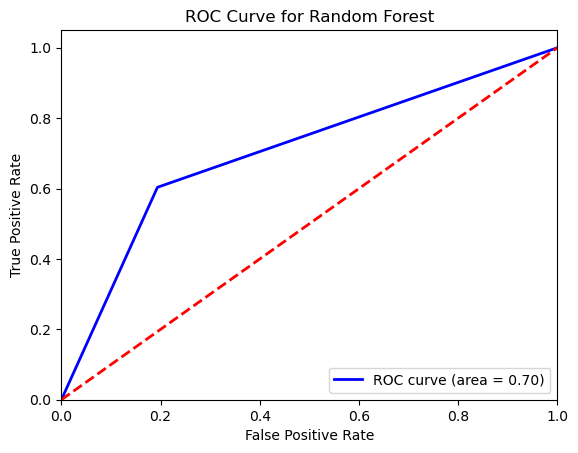

In [32]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

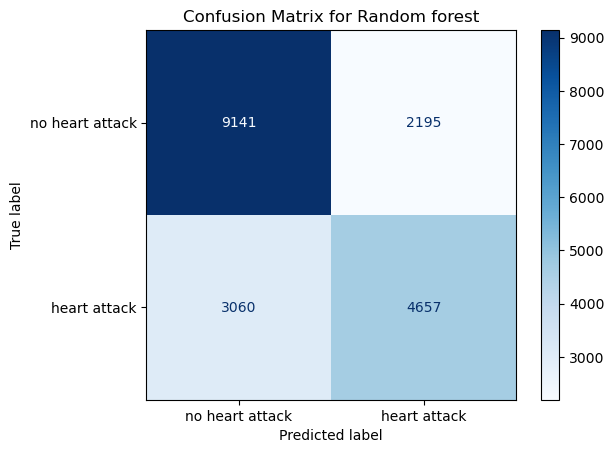

In [33]:
#confusion matrix
#Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["no heart attack", "heart attack"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random forest")
plt.show()

In [34]:
### ----- model 5 XGBoost-----### 
from xgboost import XGBClassifier
# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

D:\University\Bioinformatics tools\Anaconda machine L\installer\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:12:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [35]:
#Evaluate the model
xgb_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred, pos_label= 1))
print("Recall:", recall_score(y_test, xgb_pred, pos_label=1))
print("F1 Score:", f1_score(y_test, xgb_pred, pos_label=1))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))

Accuracy: 0.7248202382826852
Precision: 0.6743235625704622
Recall: 0.6200596086562136
F1 Score: 0.64605414163235

Confusion Matrix:
 [[9025 2311]
 [2932 4785]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77     11336
           1       0.67      0.62      0.65      7717

    accuracy                           0.72     19053
   macro avg       0.71      0.71      0.71     19053
weighted avg       0.72      0.72      0.72     19053



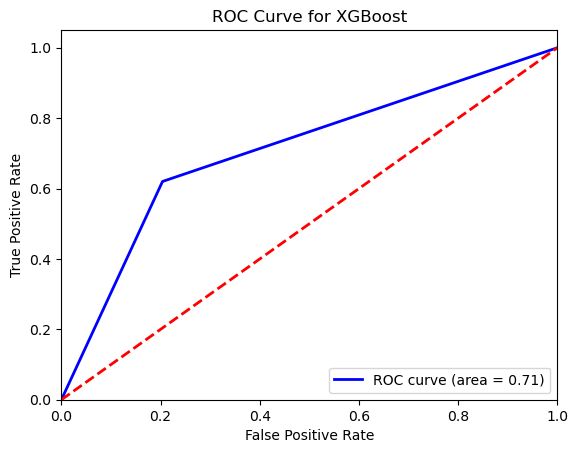

In [36]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

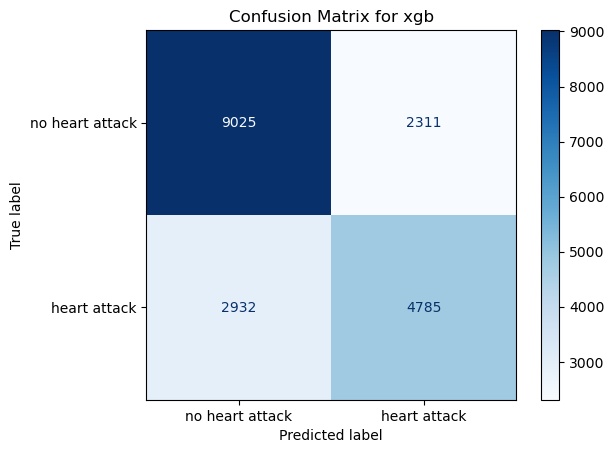

In [37]:
#confusion matrix
#Plot the Confusion Matrix
cm = confusion_matrix(y_test, xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["no heart attack", "heart attack"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for xgb")
plt.show()

In [38]:
### ----- model 6 Adaboost-----### 
ab = AdaBoostClassifier(n_estimators=50, random_state=42)
ab.fit(X_train, y_train)
results['AdaBoost'] = accuracy_score(y_test, ab.predict(X_test))
print(results)

D:\University\Bioinformatics tools\Anaconda machine L\installer\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'Random Forest': 0.7241904162074214, 'AdaBoost': 0.7361570356374324}


In [39]:
#Evaluate the model
ab_pred = ab.predict(X_test)
print("Accuracy:", accuracy_score(y_test, ab_pred))
print("Precision:", precision_score(y_test, ab_pred, pos_label= 1))
print("Recall:", recall_score(y_test, ab_pred, pos_label=1))
print("F1 Score:", f1_score(y_test, ab_pred, pos_label=1))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, ab_pred))
print("\nClassification Report:\n", classification_report(y_test, ab_pred))

Accuracy: 0.7361570356374324
Precision: 0.6984946871310508
Recall: 0.613321238823377
F1 Score: 0.6531428965707583

Confusion Matrix:
 [[9293 2043]
 [2984 4733]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79     11336
           1       0.70      0.61      0.65      7717

    accuracy                           0.74     19053
   macro avg       0.73      0.72      0.72     19053
weighted avg       0.73      0.74      0.73     19053



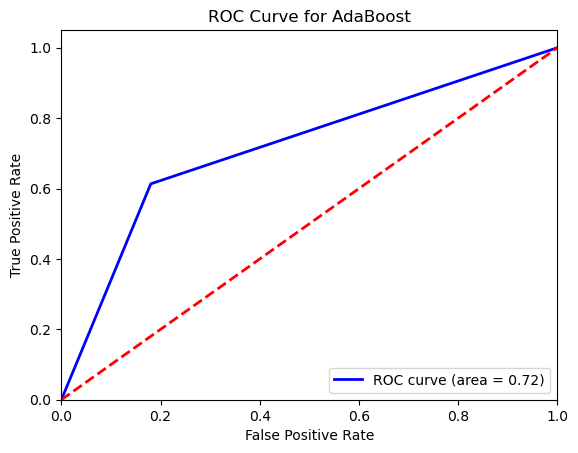

In [40]:
# Plot the ROC Curve for Adaboost
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, ab_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc="lower right")
plt.show()

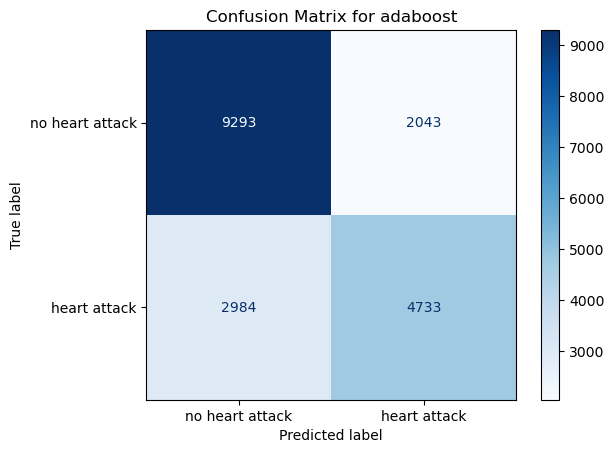

In [41]:
#Plot the Confusion Matrix
cm = confusion_matrix(y_test, ab_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["no heart attack", "heart attack"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for adaboost")
plt.show()

 Hard Voting Accuracy: 0.7240854458615441
 Classification Report (Hard Voting):
              precision    recall  f1-score   support

           0       0.74      0.82      0.78     11336
           1       0.69      0.58      0.63      7717

    accuracy                           0.72     19053
   macro avg       0.72      0.70      0.71     19053
weighted avg       0.72      0.72      0.72     19053



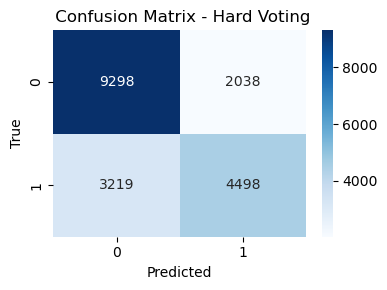


 Soft Voting Accuracy: 0.7207788799664094
 Classification Report (Soft Voting):
              precision    recall  f1-score   support

           0       0.74      0.82      0.78     11336
           1       0.68      0.58      0.63      7717

    accuracy                           0.72     19053
   macro avg       0.71      0.70      0.70     19053
weighted avg       0.72      0.72      0.72     19053



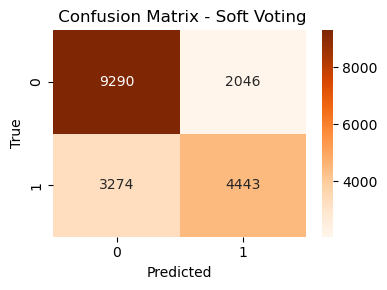

In [42]:
### ----- model 7 voting models-----### 
# Define models
lr = LogisticRegression(max_iter=1000)
nb = GaussianNB()
knn = KNeighborsClassifier()

# Hard Voting
voting_hard = VotingClassifier(
    estimators=[('lr', lr), ('nb', nb), ('knn', knn)],
    voting='hard'
)

# Soft Voting
voting_soft = VotingClassifier(
    estimators=[('lr', lr), ('nb', nb), ('knn', knn)],
    voting='soft'
)

# === Train & Evaluate Hard Voting ===
voting_hard.fit(X_train, y_train)
y_pred_hard = voting_hard.predict(X_test)
print(" Hard Voting Accuracy:", accuracy_score(y_test, y_pred_hard))
print(" Classification Report (Hard Voting):")
print(classification_report(y_test, y_pred_hard))

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_hard), annot=True, fmt='d', cmap='Blues')
plt.title(' Confusion Matrix - Hard Voting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# === Train & Evaluate Soft Voting ===
voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_test)
print("\n Soft Voting Accuracy:", accuracy_score(y_test, y_pred_soft))
print(" Classification Report (Soft Voting):")
print(classification_report(y_test, y_pred_soft))

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_soft), annot=True, fmt='d', cmap='Oranges')
plt.title(' Confusion Matrix - Soft Voting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


Evaluation for Voting Ensemble
Accuracy: 0.7308
              precision    recall  f1-score   support

           0       0.75      0.82      0.78     11336
           1       0.69      0.61      0.65      7717

    accuracy                           0.73     19053
   macro avg       0.72      0.71      0.71     19053
weighted avg       0.73      0.73      0.73     19053



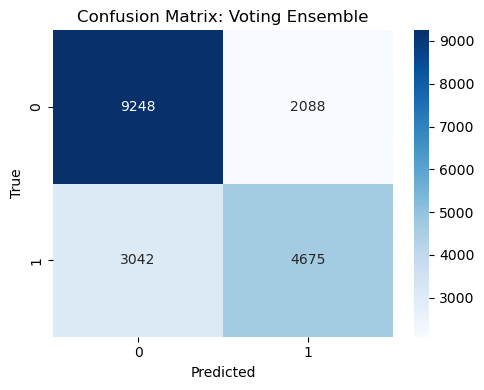

In [43]:
### ----- model 8 voting models 2-----### 
models = {
    'Random Forest': RandomForestClassifier(random_state=537),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=537),
    'AdaBoost': AdaBoostClassifier(random_state=537, algorithm='SAMME')
}

# Create Voting Classifier (hard voting)
voting = VotingClassifier(estimators=[
    ('rf', models['Random Forest']),
    ('xgb', models['XGBoost']),
    ('adb', models['AdaBoost'])
], voting='hard')

# Fit the Voting Ensemble only
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print("\nEvaluation for Voting Ensemble")
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Voting Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [44]:
### ---- summary accuracies for all the models ----###
# Define models 
models = {
    'Logistic Regression': LogisticRegression(random_state=537, solver='liblinear'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=537),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=537),
    'AdaBoost': AdaBoostClassifier(random_state=537, algorithm='SAMME')
}
voting_hard = VotingClassifier(
    estimators=[('lr', lr), ('nb', nb), ('knn', knn)],
    voting='hard'
)
models['Voting Ensemble (lr, nb, knn)'] = voting
voting = VotingClassifier(estimators=[
    ('rf', models['Random Forest']),
    ('xgb', models['XGBoost']),
    ('adb', models['AdaBoost'])
], voting='hard')
models['Voting Ensemble(rf, xgb, adb)'] = voting
# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name}: Accuracy = {accuracy:.4f}')

Logistic Regression: Accuracy = 0.7245
K-Nearest Neighbors: Accuracy = 0.6736
Gaussian Naive Bayes: Accuracy = 0.7189
Random Forest: Accuracy = 0.7243
XGBoost: Accuracy = 0.7248
AdaBoost: Accuracy = 0.7336
Voting Ensemble (lr, nb, knn): Accuracy = 0.7308
Voting Ensemble(rf, xgb, adb): Accuracy = 0.7308


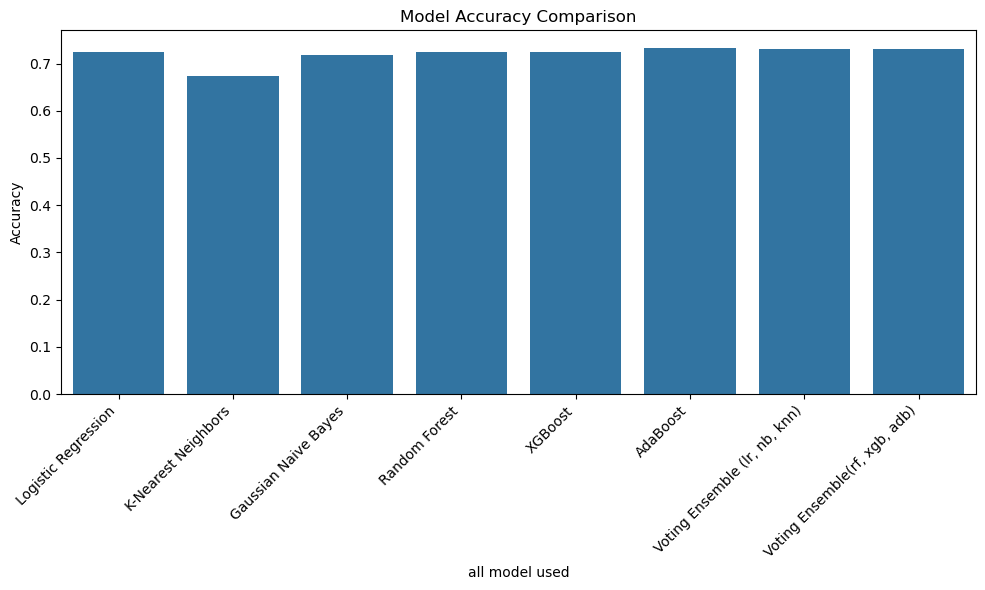

In [45]:
### --- model accuracy comparison  --- ###
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('all model used')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


 Evaluation Summary:
                           Model  Accuracy  Precision    Recall  F1-score
0            Logistic Regression  0.724453   0.721081  0.724453  0.719913
1            K-Nearest Neighbors  0.673595   0.667205  0.673595  0.662567
2           Gaussian Naive Bayes  0.718889   0.716369  0.718889  0.717009
3                  Random Forest  0.724295   0.721076  0.724295  0.720973
4                        XGBoost  0.724820   0.722198  0.724820  0.722720
5                       AdaBoost  0.733638   0.730686  0.733638  0.729041
6  Voting Ensemble (lr, nb, knn)  0.730751   0.727686  0.730751  0.727318
7  Voting Ensemble(rf, xgb, adb)  0.730751   0.727686  0.730751  0.727318


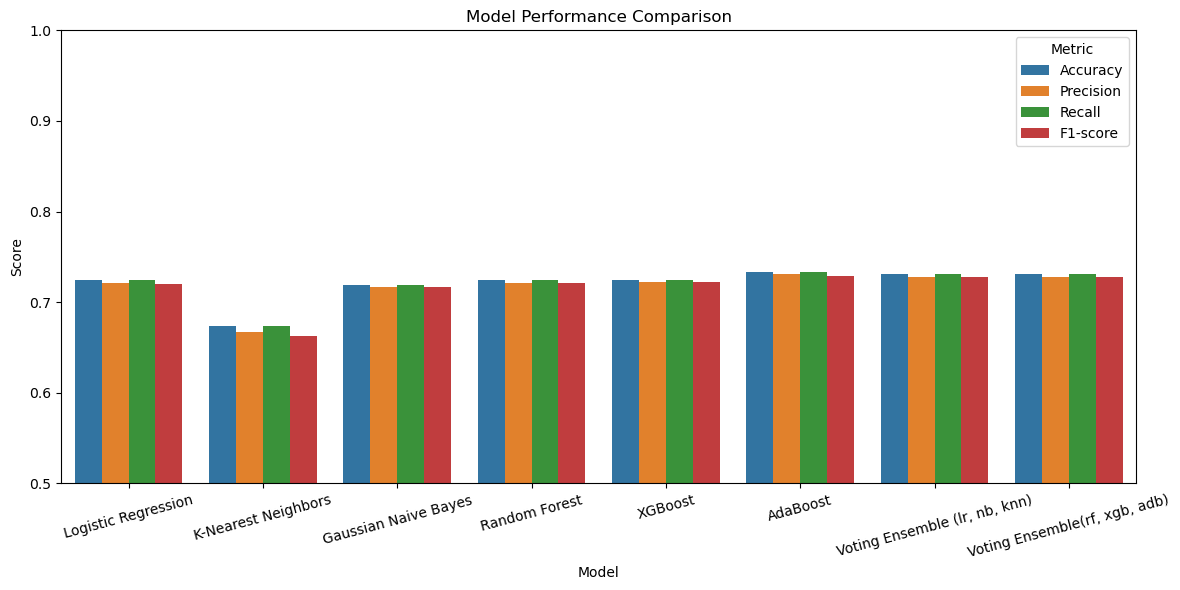

In [46]:
###------  summary for all models  ------###
summary = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    summary.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-score": report['weighted avg']['f1-score']
    })

# summary DataFrame
df_summary = pd.DataFrame(summary)
print("\n Evaluation Summary:")
print(df_summary)

# 4. Barplot of metrics
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_summary.melt(id_vars='Model', var_name='Metric', value_name='Score'),
    x='Model', y='Score', hue='Metric'
)
plt.title('Model Performance Comparison')
plt.xticks(rotation=15)
plt.ylim(0.5, 1)
plt.tight_layout()
plt.show()

After running the notebook, most of the models were good in the range of accuracy 70% with a good precision,recall and F1-score; this scores means values in the models. Accuracy -> How often the model is right overall. Useful when classes are balanced, but can be misleading if data is imbalanced.Precision-> Out of all the times the model predicted positive, how many were actually positive. Recall->Out of all actual positive cases, how many the model correctly caught.F1-Score-> Best used when you want a balance between precision and recall, especially in imbalanced datasets.

by showing a confusion matrix and ROC and AUC curves,confusion matrix->A confusion matrix is a table used to evaluate the performance of a classification model while ROC and AUC curves It show how many predictions were correct or incorrect by comparing them to the actual values. the curves show significant and very good results. It measures the overall ability of the model to rank predictions correctly. results = 1.0: Perfect model,if = 0.5: No discrimination or results > 0.8: Usually considered good. Most of the curves was observed 0.7 to 0.79 which considered good models

The models were able to predict the heart attack with good accuracy, with the 2 classes in the outcome (target), and I chose (AdaBoost  0.733638) and (Gaussian Naive Bayes 0.718889) that have the highest accuracies and very good ROC and AUC curves to make the application using streamlit

-I was able to found out the most important features that significantly cause heart attack which are Selected Features: ('hypertension', 'diabetes', 'obesity', 'smoking_status', 'previous_heart_disease')